In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1. Multivariate Linear Regression

Multivariate linear regression is linear regression with multiple variables.

Before we start let's introduce notation for equations where we can have any number of input variables.

\begin{align*}x_j^{(i)} &= \text{value of feature } j \text{ in the }i^{th}\text{ training example} \newline x^{(i)}& = \text{the input (features) of the }i^{th}\text{ training example} \newline m &= \text{the number of training examples} \newline n &= \text{the number of features} \end{align*}

The multivariable form of the hypothesis function accommodating these multiple features then takes the following form:

\begin{equation}
h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n
\end{equation}

In order to develop intuition about this function, let's suppose we're predicting the price of houses. $x_1$ being the number of square meters in the house, $x_2$ the number of floors, etc. We can think about $\theta_0$ as the basic price of a house (mean price), $\theta_1$ as the price per square meter, $\theta_2$ as the price per floor, etc. 

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:

\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \boldsymbol{\theta}^T \mathbf{x}\end{align*}


Where $\boldsymbol{\theta} = \begin{bmatrix}\theta_0 \newline \theta_1 \newline \vdots \newline \theta_n\end{bmatrix}$ and $\mathbf{x} = \begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}$.

Remark: we assume $x_{0}^{(i)} =1 \text{ for } (i\in { 1,\dots, m } )$. This allows us to do matrix operations with $\boldsymbol{\theta}$ and $\mathbf{x}$.

# 2. Gradient Descent for Multivariate Linear Regression

The gradient descent equation takes the same form as the simple linear regression; we just have to repeat it for our $n$ features:

\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}

In other words:

\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \text{for j := 0...n}\newline \rbrace\end{align*}

# 3. Feature Scaling

When features are on different scale ranges, gradient descent might take alot of time to converge. This is because $\theta$ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven. We can speed up gradient descent by having each of our input values in roughly the same range. 

This is done by modifying the ranges of our input variables so that they are all the same. Ideally:

\begin{equation}
−1 ≤ x_{(i)} ≤ 1
\end{equation}

These aren't exact requirements; the goal is to get all input variables into roughly the same range. 

Another reason why feature scaling is applied is that in some machine learning algorithms, objective functions will not work properly without normalization. For example, many regressors calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

There are many techniques for feature scaling, let's explore some of them:

##  3.1. Min-Max Normalization (Rescaling)

Also known as **min-max scaling** or **min-max normalization**, is the simplest method and consists of rescaling the range of features to scale the range in $[0, 1]$ or $[−1, 1]$. Selecting the target range depends on the nature of the data. The general formula for a min-max of $[0, 1]$ is given as:

\begin{equation}
{\displaystyle x'={\frac {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}
\end{equation}

where ${\displaystyle x}$ is an original value, ${\displaystyle x'}$ is the normalized value. For example, suppose that we have the students' weight data, and the students' weights span [160 pounds, 200 pounds]. To rescale this data, we first subtract 160 from each student's weight and divide the result by 40 (the difference between the maximum and minimum weights).

## 3.2. Mean Normalization

\begin{equation}
{\displaystyle x'={\frac {x-{\text{average}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}
\end{equation}

where ${\displaystyle x}$ is an original value, ${\displaystyle x'}$ is the normalized value. There is another form of the means normalization which is when we divide by the standard deviation which is also called standardization.


## 3.3. Z-score Normalization (Standardization)

Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks). The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next, we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

\begin{equation}
{\displaystyle x'={\frac {x-{\bar {x}}}{\sigma }}}
\end{equation}

Where ${\displaystyle x}$ is the original feature vector, ${\displaystyle {\bar {x}}={\text{average}}(x)}$ is the mean of that feature vector, and ${\displaystyle \sigma }$ is its standard deviation.

# 4. Ordinary Least Squares (OLS)

As we mentionned for simple linear regression, gradient descent gives one way of minimizing the cost function $J$. Another way includes performing the minimization explicitly and without resorting to an iterative algorithm. The "Ordinary least squares" method minimizes $J$ by taking its derivatives with respect to the $θj$ ’s, and setting them to zero. This allows us to find the optimum $\theta$ without iteration. 

The OLS formula for multi-variate linear regression is given below:

\begin{equation}
{\displaystyle {\hat {\boldsymbol {\theta }}}=(\mathbf {X} ^{\rm {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\rm {T}}\mathbf {y} .}
\end{equation}

## 4.1. Gradient Descent vs. Ordinary Least Squares

The following is a comparison of gradient descent and the OLS:

|Gradient Descent                             |Ordinary Least Squares                       |
|---------------------------------------------|---------------------------------------------|
|Need to choose $\alpha$                      |No need to choose $\alpha$                   |
|Needs many iterations                        |No need to iterate                           |
|$O(kn^2)$                                    |$O(n^3)$, need to calculate inverse of $X^TX$|
|Works well when n is large                   |Slow if n is very large                      |

With the ordinary least squares, computing the inversion has complexity $O(n^3)$. So if we have a very large number of features, the ols will be slow.

## 4.2. Ordinary Least Squares Noninvertibility

When implementing OLS, $\mathbf {X} ^{\rm {T}}\mathbf {X}$ should be invertible. If it is noninvertible, the common causes might be having :

* Redundant features, where two features are very closely related (i.e. they are linearly dependent)
* Too many features (e.g. $m \leq n$). 

Solutions to the above problems include deleting a feature that is linearly dependent on another or deleting one or more features when there are too many features.


# 5. Polynomial Regression

So far, we've seen linear hypothesis functions. But what if our hypothesis function (a straight line) does not fit the data well? 

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $nth$ degree polynomial in $x$. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding output $h_{\theta}(x)$. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function $h_{\theta}$ is linear as a function of the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

For example, if our hypothesis function is $h_\theta(x) = \theta_0 + \theta_1 x_1$, then we can create additional features based on $x_1$, to get the quadratic function $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2$ or the cubic function $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$.

In the cubic version, we have created new features $x_2$ and $x_3$ where $x_2 = x_1^2$ and $x_3 = x_1^3$.

# 6. Other types of features

### 6.1. Interaction Terms

We can combine multiple features into one. For example, we can combine two features $x_1$ and $x_2$ into a new feature $x_3 = x_1 \times x_2$. This could be interesting when the effect on $y$ of increasing $x_1$ depends on another feature $x_2$. $x_1 \times x_2$ is the **interaction term**.

### 6.2. Square Root Features

To make it a square root function, we could use: $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 \sqrt{x_1}$.


One important thing to keep in mind is if you choose to add **polynomial features**, **interaction terms** or any other type of features that you find adequate, then feature scaling becomes very important.

Example: if $x_1$ has [1,1000] range,  then range of $x_1^2$ becomes [1,1000000] and that of $x_1^3$ becomes [1, 1000000000].

# 7.  Polynomial Regression with Python

Till now, we have covered most of the theory behind Polynomial Regression. Now, let’s implement these concepts on the Boston Housing dataset.

First, we will import the required libraries.

In [2]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Next, we will load the housing data from the scikit-learn library and understand it.

In [3]:
boston_dataset = load_boston()

We print the value of the boston_dataset to understand what it contains

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Dataset description:

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The price of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.
We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [7]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to elaborate polynomial regression visually, we will use LSTAT as our only feature for now. Using a scatter plot let’s see how this feature varies with MEDV.

Text(0, 0.5, 'MEDV')

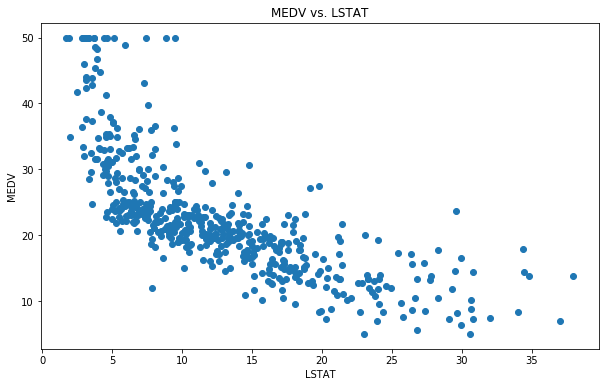

In [8]:
plt.figure(figsize=(10, 6))

X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']

plt.scatter(X, Y, marker='o')
plt.title('MEDV vs. LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404,)
(102, 1)
(102,)


Let's visualize the split on a scatter plot:

Text(0, 0.5, 'MEDV')

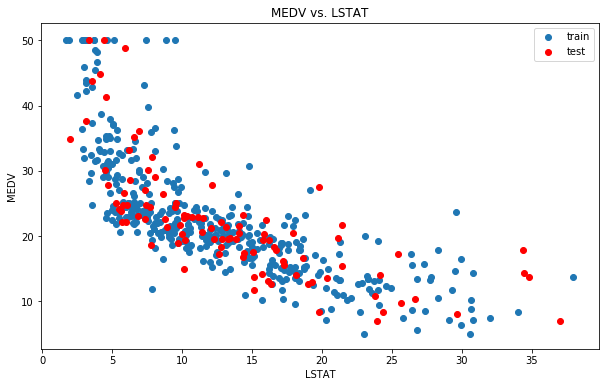

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, marker='o')
plt.scatter(X_test, y_test, marker='o', c='red')
plt.title('MEDV vs. LSTAT')
plt.legend(['train', 'test'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

We use scikit-learn’s LinearRegression to train our model on the training set and measure performance on both the training and test sets.

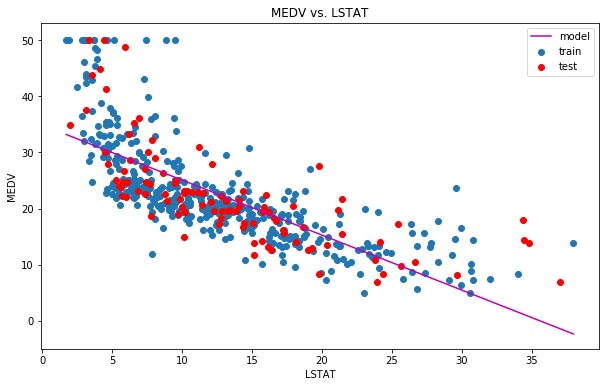

In [11]:
# fit linear model
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# predicting over training & testing datasets
y_train_pred = model_lin.predict(X_train)
y_test_pred = model_lin.predict(X_test)

# plot initial dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, marker='o')
plt.scatter(X_test, y_test, marker='o', c='red')

# sort features and predictions
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(np.array(X_train) ,y_train_pred), key=sort_axis)
X_train_sorted, y_train_pred_sorted = zip(*sorted_zip)

# Add linear model
plt.plot(X_train_sorted, y_train_pred_sorted, color='m')   
plt.title('MEDV vs. LSTAT')
plt.legend(['model', 'train', 'test'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Model hypothesis function:

In [12]:
def generate_model_hypothesis(intercept, coefficients):
    formula = "y = " + str(np.round(intercept, 3))

    for power, theta in np.ndenumerate(coefficients):
        if theta > 0:
            formula = formula + "+"+str(np.round(theta,3))+"x^"+str(power[0]+1)
        if theta < 0:
            formula = formula +str(np.round(theta,3))+"x^"+str(power[0]+1)
            
    return formula

In [13]:
generate_model_hypothesis(model_lin.intercept_, model_lin.coef_)

'y = 34.873-0.98x^1'

We can see that the straight line is unable to capture the patterns in the data. This is an example of **under-fitting**. Computing the RMSE and R²-score of the linear line gives:

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.201452973865344
R2 score is 0.5523019908037391


The model performance for testing set
--------------------------------------
RMSE is 6.2307165730986815
R2 score is 0.5041523728903132


To overcome **under-fitting**, we need to increase the complexity of the model.
To generate a higher-order equation we can add powers of the original features as new features. 

In [15]:
def create_polynomial_regression_model(degree):
    # Adding polynomial features
    polynomial_features= PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # predicting over training & testing datasets
    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_test_pred_poly = model_poly.predict(X_test_poly)

    # plot initial dataset
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, marker='o')
    plt.scatter(X_test, y_test, marker='o', c='red')

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(np.array(X_train) ,y_train_pred_poly), key=sort_axis)

    X_train_sorted, y_train_pred_poly_sorted = zip(*sorted_zip)

    plt.plot(X_train_sorted, y_train_pred_poly_sorted, color='m')
    plt.title('MEDV vs. LSTAT')
    plt.legend(['model', 'train', 'test'])
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.show()
    
    
    print("model hypothesis: ", generate_model_hypothesis(model_poly.intercept_, model_poly.coef_))
    print("\n")
    
    # model evaluation for training set
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred_poly)))
    r2 = r2_score(y_train, y_train_pred_poly)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred_poly)))
    r2 = r2_score(y_test, y_test_pred_poly)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

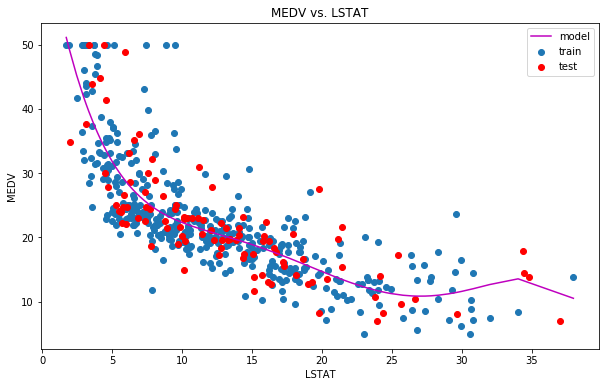

model hypothesis:  y = 69.51-12.835x^2+1.393x^3-0.075x^4+0.002x^5-0.0x^6


The model performance for training set
--------------------------------------
RMSE is 5.189224470483828
R2 score is 0.6865248142011549


The model performance for testing set
--------------------------------------
RMSE is 5.176942964726688
R2 score is 0.6576904564361374


In [16]:
create_polynomial_regression_model(5)

Fitting a linear regression model on the transformed features gives the above plot. It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. Computing the RMSE and R²-score of the quadratic plot shows better results.

For degree=15, the model is also capturing the noise in the data. This is an example of **over-fitting**. Even though this model passes through many of the data points, it will fail to generalize on unseen data.

# 8. Regularization in  Regression Models

As we add more and more parameters to our model, its complexity increases, which results in increasing variance and decreasing bias, i.e., **overfitting**.

In the precedent section, we have seen that in order to overcome underfitting or high bias, we can basically add new parameters to our model so that the model complexity increases, and thus reducing high bias. Now, how can we overcome overfitting for a regression model?

Basically there are two methods to overcome overfitting,

* Reduce the model complexity
* **Regularization**

As we have seen before, in regularization, the cost function is penalized in order to reduce the values of our model parameters. A regularized regression cost function can then take the following form:

$$ J(\theta_0,\theta_1)\ =\ \frac{1}{2m}\sum_{i=1}^m (\theta_0+\theta_1x_i-y_i)^2 + P(\lambda,\theta)$$

We have different types of regression techniques that uses regularization to overcome this problem. 

## 8.1. Ridge Regression

In Ridge Regression, the loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero:

$$ J(\theta)\ =\ \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 +\ \lambda\sum_{j=1}^n\theta_j^2$$

Here if you notice, we come across an extra term, which is known as the penalty term. By changing the values of $\lambda$ (the regularization coefficient), we are basically controlling the penalty term. Higher the values of $\lambda$, bigger is the penalty and therefore the magnitude of coefficients are reduced.

Important Points about Ridge Regression:

* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses $L_2$ regularization technique. 

## 8.2. Lasso Regression

The mathematics behind Lasso regression is quite similar to that of Ridge. The only difference being instead of adding squares of $\theta$, we will add the absolute value of $\theta$.

$$ J(\theta)\ =\ \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 +\ \lambda\sum_{j=1}^n|\theta_j|$$

Important Points about Lasso Regression:

* It uses $L_1$ regularization technique 
* It is generally used when we have a high number of features, because it automatically does feature selection.

## 8.3. Reguralization for Sparsity 

Let us try to visualize the effect of $L_1$ and $L_2$ regularization by plotting them. For making visualization easy, let us plot them in 2D space. For that we suppose that we just have two parameters $\theta_0$ and $\theta_1$. 

The regularization forces the model optimisation to find the best trade-off between the initial cost function and the complexity of the model represented by the penalty/regularization term $P(\lambda,\theta)$.

In other words, if we keep the regularization term $P(\lambda,\theta)$ smaller than certain value, we've achieved our goal. Now let's visualize what it means for the $L_2$ norm of our weight vector to be under certain value, let's say 1. Since $L_2$ is the Euclidean distance from the origin, our desired vector should then be bound within a circle with a radius of 1, centered on the origin. 

This was great at keeping weights small, but it can leave the model unnecessarily large and complex, since all of the features may still remain even with small weights.

When trying to keep $L_1$ norm under certain value, the area in which our weight vector can reside will take the shape of the diamond shown below. The most important takeaway here is that, when applying $L_1$ regularization, the optimal value of certain weights can end up being zero, and that's because of the extreme diamond shape of this optimal region. Thus as opposed to the smooth circular shape in $L_2$ regularization.

This property of $L_1$ regularization is extensively used as a feature selection mechanism. This acts as a built-in feature selector by killing all bad features and leaving only the strongest in the model. This has many benefits especially with sparse features. With fewer coefficients to store and load, there is a reduction in storage and memory needed with a much smaller model size, which is especially important for embedded models. 

<img src="figures/Ridge_vs_Lasso_Regression.png" alt="Ridge_vs_Lasso_Regularization" style="width: 600px;"/>

Actually, there are different possible choices of regularization with different choices of order of the parameter in the regularization term, which is denoted by $\sum_{j=1}^n|\theta_j|^p$ This is more generally known as $L_p$ regularizer. The $L_0$ for $p=0$ norm is the count of the non-zero values in a vector, and the L-infinity norm for $p \to \infty$ the maximum absolute value of any value in a vector.

\begin{align*}
L_0 \text{-norm} &= \lVert \boldsymbol{\theta} \rVert_0 = \sum_{j=0}^n |\theta_j|^0 \newline
L_1 \text{-norm} &= \lVert \boldsymbol{\theta} \rVert_1 = \sum_{j=0}^n |\theta_j| \newline
L_2 \text{-norm} &= \lVert \boldsymbol{\theta} \rVert_2 = \sum_{j=0}^n |\theta_j|^2 \newline
L_{\infty} \text{-norm} &= \lVert \boldsymbol{\theta} \rVert_{\infty} = max\big\{|\theta_0|,|\theta_1|, ..., |\theta_n|\big\} \newline
\end{align*}


## 8.4. Elastic Net Regression
 
In practice, usually the $L_2$-norm provides more generalizable models than the $L_1$-norm. However, in some situations, we will end up with much more complex heavy models if we use $L_2$ instead of $L_1$. This happens because often features have high correlation with each other, and the $L_1$ regularization uses one of them and throw away the other, whereas $L_2$
regularization will keep both features and keep their weight magnitudes small. Therefore, with $L_1$, you can end up with a smaller model but it may be less predictive. 

To get the best of both worlds, a third commonly used model of regression is the Elastic Net which incorporates penalties from both $L_1$ and $L_2$ regularization. This way, you get the benefits of sparsity for really poor predictive features while also keeping decent and great features with smaller weights to provide a good generalization. The only trade off now is that there are two instead of one hyperparameters to tune with the two different $\lambda$ regularization parameters.

$$ J(\theta)\ =\ \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 +\ \lambda_1\sum_{j=1}^n|\theta_j|+\ \lambda_2\sum_{j=1}^n\theta_j^2$$

Another way to write the cost function in Elastic Net includes having a regularization parameter $\lambda$ and another parameter $\alpha$ corresponding to the weight of $L_1$ and $L_2$ penalty in your cost function:

$$ J(\theta)\ =\ \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 +\ \lambda( \frac{1-\alpha}{2}\sum_{j=1}^n\theta_j^2 + \alpha \sum_{j=1}^n|\theta_j| ) $$

Therefore, in addition to setting and choosing a $\lambda$ value, elastic net also allows us to tune the $\alpha$ parameter where $\alpha = 0$ corresponds to ridge and $\alpha = 1$ to lasso. Simply put, if you plug in $0$ for $\alpha$, the penalty function reduces to the $L_1$ (ridge) term and if we set $\alpha$ to $1$ we get the $L_2$ (lasso) term. Therefore we can choose an alpha value between 0 and 1 to optimize the elastic net. Effectively this will shrink some coefficients and set some to 0 for sparse selection.

# 9.  Ridge, Lasso & Elastic Net with Python

Let's use the same housing example, this time we will consider all input features (multi-variate linear regression).

In [17]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Let's load the boston data, load it into a pandas dataframe, and split data into a training set and a testing set.

In [18]:
boston_dataset = load_boston()

feature_cols = boston_dataset.feature_names.tolist()

boston = pd.DataFrame(boston_dataset.data, columns=feature_cols)
boston['MEDV'] = boston_dataset.target

X = pd.DataFrame(np.c_[boston[feature_cols]], columns = feature_cols)
Y = boston[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Let's fit a multivariate polynomial regression model of the second degree, and evaluate its performance.

In [19]:
# fit linear model
# Adding polynomial features
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# predicting over training & testing datasets
y_train_pred = model_poly.predict(X_train_poly)
y_test_pred = model_poly.predict(X_test_poly)

In [20]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.424742963026645
R2 score is 0.9315569004651907


The model performance for testing set
--------------------------------------
RMSE is 3.196527651332134
R2 score is 0.8694943908786059


Let's plot the weight coefficients of the first degree features of our model:

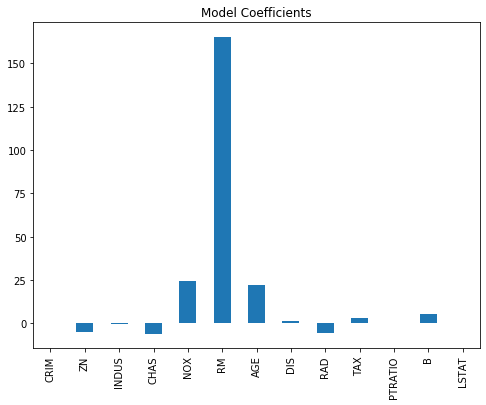

In [21]:
coef = pd.Series(model_poly.coef_[0][:13], feature_cols)

plt.figure(figsize=(8, 6))
coef.plot(kind='bar', title='Model Coefficients')

### Ridge Regression

Now, let's try to train a ridge model with a regularization parameter $\lambda = 0.05$.

In [22]:
## training the model
model_ridge = Ridge(alpha=0.02, normalize=True)
model_ridge.fit(X_train_poly, y_train)

# predicting over training & testing datasets
y_train_pred = model_ridge.predict(X_train_poly)
y_test_pred = model_ridge.predict(X_test_poly)

Let's examine how our model parameters are shrinked with ridge regression:

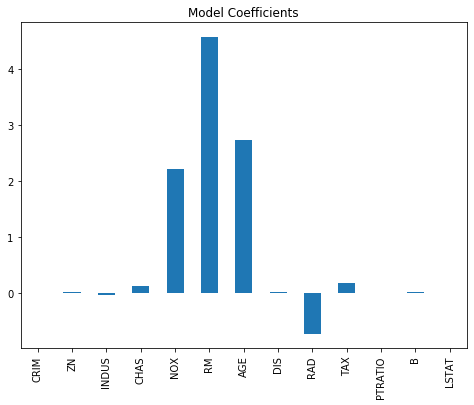

In [23]:
coef = pd.Series(model_ridge.coef_[0][:13], feature_cols)

plt.figure(figsize=(8, 6))
coef.plot(kind='bar', title='Model Coefficients')

We can notice how the model parameters have shrinked.

Ridge Regression model evaluation:

In [24]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.212454315321497
R2 score is 0.879864274858493


The model performance for testing set
--------------------------------------
RMSE is 2.9787431254124708
R2 score is 0.8866717055367619


So, we can see that there is a slight improvement in our model because the value of the RMSE has decreased (or the value of R2 score has increased depending on what metric we're optimizing for). Note that the value of $\lambda$ is a hyperparameter of Ridge Regression, which means that they are not automatically learned by the model instead they have to be set manually or can be tuned using one of the hyperparameter tuning approaches.

You can see that, as we increase the value of $\lambda$, the magnitude of the coefficients decreases, where the values reach zero but not absolute zero.

The value of $\lambda$ can be chosen wisely by iterating it through a range of values and using the one which gives us the lowest error. Let's hypertune $\lambda$ using the grid search approach over a cross-validation dataset. 

In [25]:
## training the model
param_grid = {'alpha': [0.001, 0.005, 0.008, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5, 1, 10]}

model_ridge = Ridge(normalize=True)
search = GridSearchCV(model_ridge, param_grid, scoring='r2', cv=5)
search.fit(X_train_poly,y_train)

# predicting over training & testing datasets
y_train_pred = search.predict(X_train_poly)
y_test_pred = search.predict(X_test_poly)

The best estimator and its performance on the cross validation set are:

In [26]:
print("Best estimator: ", search.best_estimator_)
print("Best CV R2 score: ", search.best_score_)

Best estimator:  Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
Best CV R2 score:  0.8539570210178583


In [27]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.6703396620101274
R2 score is 0.9169898370752075


The model performance for testing set
--------------------------------------
RMSE is 2.8068792529578883
R2 score is 0.899371799208994


### Lasso Regression

Now, let's try to train a lasso model while hypertuning the regularization parameter.

In [28]:
## training the model
param_grid = {'alpha': [10**(-5), 10**(-4), 10**(-3), 0.005, 0.008, 0.01, 0.05, 0.1, 0.5, 1, 10]}

model_lasso = Lasso(normalize=True)
search = GridSearchCV(model_lasso, param_grid, scoring='r2', cv=5)
search.fit(X_train_poly, y_train)

# predicting over training & testing datasets
y_train_pred = search.predict(X_train_poly)
y_test_pred = search.predict(X_test_poly)

The best estimator and its performance on the cross validation set are:

In [29]:
print("Best estimator: ", search.best_estimator_)
print("Best CV R2 score: ", search.best_score_)

Best estimator:  Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Best CV R2 score:  0.8364463474425128


Let's examine how our model parameters have changed with lasso regression:

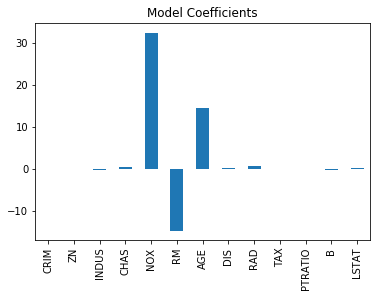

In [30]:
coef = pd.Series(search.best_estimator_.coef_[:13],feature_cols)
coef.plot(kind='bar', title='Model Coefficients')

In Ridge, we have seen that as we increased the value of $\lambda$, coefficients were approaching zero, but if you see the case of Lasso, even at smaller $\lambda$’s, our coefficients are reduced to absolute zeroes. Therefore, lasso selects only some features while reduces the coefficients of others to zero. This property is known as feature selection and is absent in the case of Ridge.

Lasso regression model evaluation:

In [31]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.715734263157101
R2 score is 0.9141435757729551


The model performance for testing set
--------------------------------------
RMSE is 2.9337146666466976
R2 score is 0.8900720849828134


Which model is the best? Well, everything is relative.

Based on the predefined single evaluation metric, you can fit different models and choose the one with the best performance on the unseen testing dataset. 

Let's compare some of the predictions of houses with their actual prices:

In [32]:
predictions = y_test
predictions['Predicted'] = y_test_pred
predictions = predictions.sort_index().reset_index()
predictions.head(10)

,index,MEDV,Predicted
0,21,19.6,15.981293
1,28,18.4,17.410332
2,34,13.5,15.325320
3,40,34.9,35.912218
4,43,24.7,26.588107
5,49,19.4,18.999143
6,50,19.7,20.559252
7,52,25.0,27.703720
8,56,24.7,23.823525
9,66,19.4,17.224385


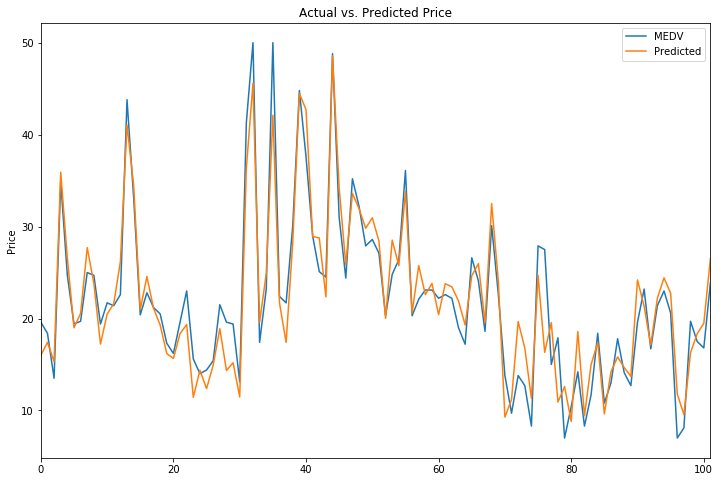

In [33]:
# plot initial dataset
plt.figure(figsize=(12, 8))
predictions['MEDV'].plot(legend=True)
predictions['Predicted'].plot(legend=True)
plt.title('Actual vs. Predicted Price')
plt.ylabel('Price')
plt.show()